#K-Means empleando datos externos

Se presentan algunas herramientas básicas para el abordar el tema de la Inteligencia Artificial y llevarla al Aula.

En esta guía se desarrollará una aplicación de Aprendizaje de Máquina (*Machine Learning, ML*). Específicamente se empleará el algoritmo K-Means para crear grupos y clasificar datos.

El trabajo se realizará empleando código en Python. Un buen resumen de los aspectos básicos de Python: <br>
[Introducción a Python](https://colab.research.google.com/github/FerneyOAmaya/DataLiteracy/blob/master/0_Python.ipynb)

Se realizó a partir de información presentada en: <br>
- https://realpython.com/k-means-clustering-python/
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/

Contenido:
1. K-Means
2. Optimizar el número de grupos
3. Resultado

#1.K- Means

###**Paso 1** : Llamar a las bibliotecas

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

###**Paso 2** : Cargar un conjunto de datos

Montar el Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargar el archivo desde el Drive:

In [ ]:
enlace = '/content/drive/My Drive/Colab Notebooks/IA_Educacion/clustering.csv'
datos = pd.read_csv(enlace)

###**Paso 3** : Explorar el conjunto de datos

Dimensiones:

In [ ]:
datos.shape

(381, 13)

In [ ]:
datos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Graficaremos dos variables de interés:
- ApplicantIncome: ingreso anual del solicitante
- LoanAmount: monto del préstamo, en miles

Se seleccionan solo las columnas de interés en una nueva variable:

In [ ]:
dat = datos[['ApplicantIncome', 'LoanAmount']]

Se sugiere el escalamiento de los datos, Si se quiere realizar debe emplearse el siguiente código, para que entregue valores con media de 0 y desviación estándar de 1:

```
scaler = StandardScaler()
dat_esc = scaler.fit_transform(dat)
```

La variable dat_esc es un objeto numpy, que se indexa: dat_esc[:, 0] y dat_esc[:, 1].

Gráfica de los datos seleccionados

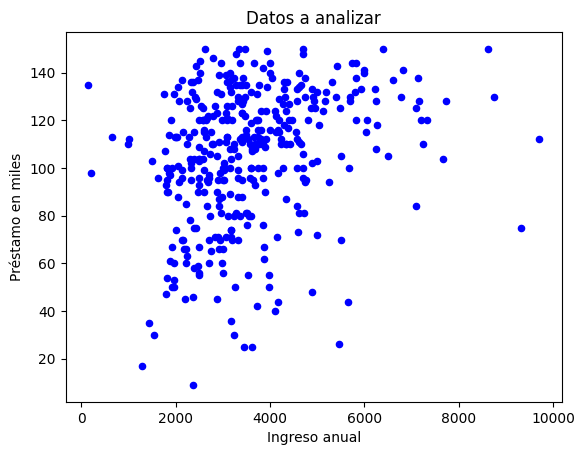

In [ ]:
plt.scatter(dat['ApplicantIncome'],  dat['LoanAmount'], c='blue',s=20)
plt.title("Datos a analizar")
plt.xlabel('Ingreso anual')
plt.ylabel('Préstamo en miles')
plt.show()

###**Paso 4** : Emplear k-means

Estos son los parámetros:
- init: controla la técnica de inicialización, "random" indica aleatorio.
- n_clusters: número de grupos.
- n_init: cantidad de inicializaciones o ejecuciones diferentes y entrega el mejor resultado.
- max_iter: número máximo de iteraciones para cada inicialización.

In [ ]:
 kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)
kmeans.fit(dat)
centroides = kmeans.cluster_centers_

###**Paso 5** : Analizar los resultados
Los resultados de la ejecución están disponibles como atributos de *kmeans*. Los principales son:
- kmeans.inertia_ : parámetro de desempeño que indica que tan buena es la agrupación. Se llama SSE (*Sum of Square Error*, suma de los errores cuadrados).
- kmeans.cluster_centers_: valor de los centroides de cada agrupación (cluster).
- kmeans.labels_: etiquetas asignadas con el valor del grupo al que pertenecen.

In [ ]:
print('SSE: ', kmeans.inertia_)
print('Centroides :')
print(kmeans.cluster_centers_)
print('Etiquetas de cada registro')
print(kmeans.labels_)

SSE:  151285948.94516143
Centroides :
[[2497.97252747   97.47252747]
 [6512.76744186  119.48837209]
 [4033.59615385  109.75641026]]
Etiquetas de cada registro
[2 0 0 1 0 0 0 0 0 2 2 2 2 0 1 0 2 0 2 0 2 0 2 2 0 2 2 2 0 0 2 2 2 1 1 0 2
 0 0 2 2 0 0 2 2 0 0 2 0 1 2 0 2 2 2 0 2 2 2 0 2 0 0 2 2 2 0 0 2 0 2 0 1 0
 1 0 2 0 2 0 0 2 0 0 2 2 2 2 2 0 0 0 2 1 0 0 0 0 0 1 2 0 0 0 2 2 2 0 2 0 0
 2 2 0 0 2 2 2 0 2 0 2 2 2 0 2 0 2 2 1 0 2 0 2 2 2 0 2 0 1 2 0 2 0 0 2 2 2
 1 0 1 2 1 1 1 0 0 2 0 1 2 2 0 1 2 2 2 0 0 0 0 2 0 0 2 2 0 0 0 0 2 2 0 2 0
 1 2 2 0 0 0 2 0 2 2 0 0 0 0 1 2 2 0 2 0 2 0 2 2 0 2 0 0 1 2 0 0 0 0 0 1 0
 2 2 0 2 2 0 1 1 0 2 0 0 2 1 2 0 1 2 1 2 2 0 0 1 0 0 0 2 0 0 2 0 0 0 0 0 2
 0 0 2 0 0 0 0 1 0 0 1 0 2 1 0 0 1 1 0 2 0 1 2 2 2 2 2 0 0 2 0 1 2 2 2 1 2
 2 1 0 0 2 0 2 0 0 0 0 0 2 0 0 2 2 2 0 2 0 0 0 2 2 2 2 2 0 2 0 0 2 0 0 1 2
 0 1 2 2 0 2 0 2 0 2 0 0 2 0 2 0 2 1 0 2 1 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 0 2 2 0 1 0 0 2 2]


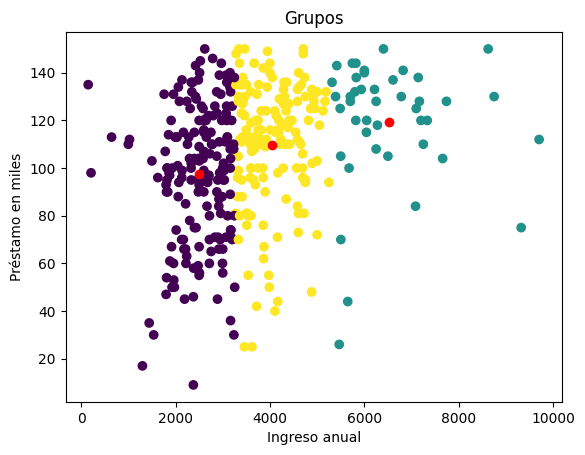

In [ ]:
plt.scatter(dat['ApplicantIncome'],  dat['LoanAmount'], c=kmeans.labels_)
plt.scatter(centroides[:, 0], centroides[:, 1], color='red')
plt.title('Grupos')
plt.xlabel('Ingreso anual')
plt.ylabel('Préstamo en miles')
plt.show()

# Optimizar el número de grupos
Para encontrar el número óptimo de grupos se emplea el método del codo. Se grafica el SSE para diferentes valores de grupo y se escoge el valor donde inicia la inflexión.

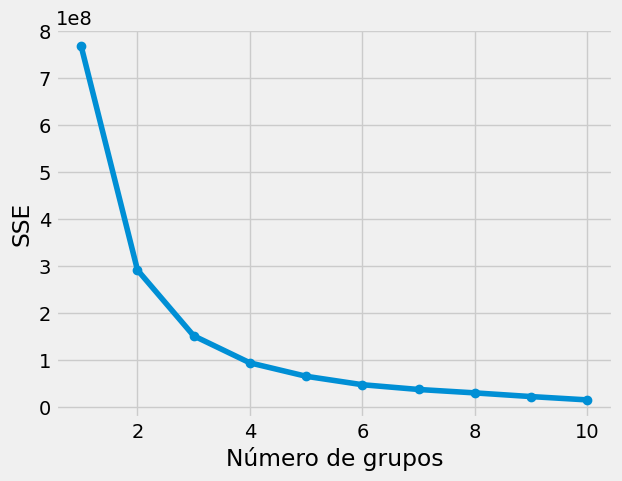

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
   "random_state": 42,
}
sse = []

grupos = range(1,11)
for k in grupos:
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(dat)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(grupos, sse, '-o')
plt.xlabel("Número de grupos")
plt.ylabel("SSE")
plt.show()